In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [18]:
df = pd.read_csv("Auto.csv",delimiter=",")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


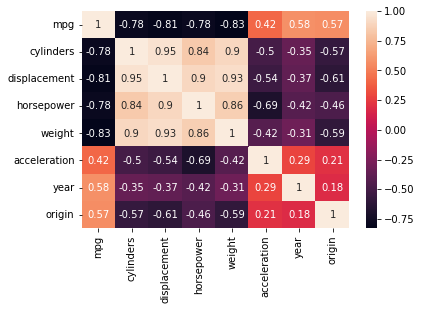

In [19]:
sns.heatmap(data=df.corr().round(2), annot=True)
plt.show()

In [24]:
x = df[['cylinders','displacement','horsepower','weight','acceleration','year']]
y = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=100)

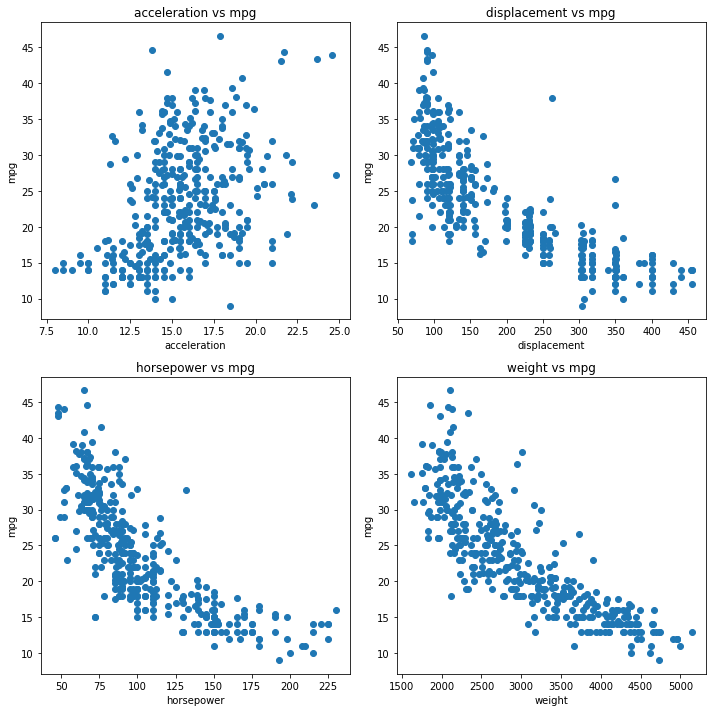

In [26]:
def scatter(x,fig):
    plt.subplot(2,2,fig)
    plt.scatter(df[x],df['mpg'])
    plt.title(x+' vs mpg')
    plt.ylabel('mpg')
    plt.xlabel(x)

plt.figure(figsize=(10,10))

scatter('acceleration', 1)
scatter('displacement', 2)
scatter('horsepower', 3)
scatter('weight', 4)
plt.tight_layout()

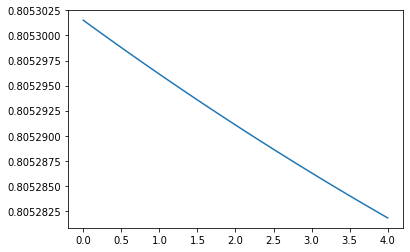

In [28]:
alphas = np.linspace(0,4,50) # past 4 the score decreases
r2values = []
for alp in alphas:
    rr = Ridge(alpha=alp)
    rr.fit(X_train, y_train)
    r2_test = r2_score(y_test, rr.predict(X_test))
    r2values.append(r2_test)


plt.plot(alphas,r2values)
plt.show()

In [21]:
alphas = [0.1,0.2,0.3,0.4,0.5,1,2,3,4,5,6,7,8]
scores = []
for alp in alphas:
    lasso = linear_model.Lasso(alpha=alp)
    lasso.fit(X_train, y_train)
    print(lasso.coef_.round(2))
    sc = lasso.score(X_test, y_test)  # =R^2
    scores.append(sc)
    print("alpha=",alp," lasso score:", sc)

[-0.2   0.01  0.01 -0.01  0.13  0.7 ]
alpha= 0.1  lasso score: 0.7734705894488578
[-0.    0.    0.   -0.01  0.1   0.69]
alpha= 0.2  lasso score: 0.7748211453201698
[-0.    0.    0.   -0.01  0.07  0.68]
alpha= 0.3  lasso score: 0.7750098466243724
[-0.    0.   -0.   -0.01  0.05  0.67]
alpha= 0.4  lasso score: 0.7746847678322341
[-0.    0.   -0.   -0.01  0.01  0.66]
alpha= 0.5  lasso score: 0.7746429535277378
[-0.    0.   -0.   -0.01  0.    0.62]
alpha= 1  lasso score: 0.7708170585064883
[-0.   -0.   -0.01 -0.01  0.    0.53]
alpha= 2  lasso score: 0.7607996430293982
[-0.   -0.   -0.01 -0.01  0.    0.44]
alpha= 3  lasso score: 0.748335685124867
[-0.   -0.   -0.01 -0.01  0.    0.35]
alpha= 4  lasso score: 0.7334449328575003
[-0.   -0.   -0.01 -0.01  0.    0.27]
alpha= 5  lasso score: 0.7161089977954003
[-0.   -0.   -0.01 -0.01  0.    0.18]
alpha= 6  lasso score: 0.6963279683866691
[-0.   -0.   -0.02 -0.01  0.    0.09]
alpha= 7  lasso score: 0.674102142182861
[-0.   -0.   -0.02 -0.01  0.    

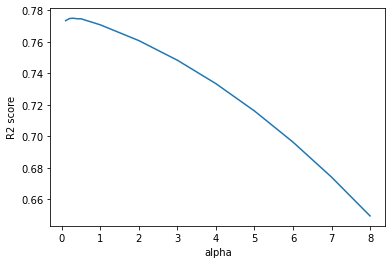

In [23]:
plt.plot(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.show()